In [1]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_VsU9xXK.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_Wc8LBpr.csv

--2020-05-17 16:40:01--  https://datahack-prod.s3.amazonaws.com/test_file/test_VsU9xXK.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.32
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4921161 (4.7M) [text/csv]
Saving to: ‘test_VsU9xXK.csv’

test_VsU9xXK.csv    100%[===================>]   4.69M  5.55MB/s    in 0.8s    

2020-05-17 16:40:02 (5.55 MB/s) - ‘test_VsU9xXK.csv’ saved [4921161/4921161]

--2020-05-17 16:40:08--  https://datahack-prod.s3.amazonaws.com/train_file/train_Wc8LBpr.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.52
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7675045 (7.3M) [text/csv]
Saving to: ‘train_Wc8LBpr.csv’

train_Wc8LBpr.csv   100%[=======

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('train_Wc8LBpr.csv')
test = pd.read_csv('test_VsU9xXK.csv')

In [43]:
train.head(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [44]:
test.head(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [45]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape

(Trip_ID                            0
 Trip_Distance                      0
 Type_of_Cab                    20210
 Customer_Since_Months           5920
 Life_Style_Index               20193
 Confidence_Life_Style_Index    20193
 Destination_Type                   0
 Customer_Rating                    0
 Cancellation_Last_1Month           0
 Var1                           71030
 Var2                               0
 Var3                               0
 Gender                             0
 Surge_Pricing_Type                 0
 dtype: int64, Trip_ID                            0
 Trip_Distance                      0
 Type_of_Cab                    13158
 Customer_Since_Months           3966
 Life_Style_Index               13327
 Confidence_Life_Style_Index    13327
 Destination_Type                   0
 Customer_Rating                    0
 Cancellation_Last_1Month           0
 Var1                           46789
 Var2                               0
 Var3                               

In [0]:
l=['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index']
for i in l:
  train[i]=train[i].fillna(method='bfill')
  test[i]=test[i].fillna(method='bfill')

In [0]:
l=['Life_Style_Index','Var1']
for i in l:
  train[i]=train[i].fillna(train[i].mean())
  test[i]=test[i].fillna(train[i].mean())

In [48]:
train['Trip_ID'].nunique()

131662

In [0]:
train['Trip_ID']=train.Trip_ID.str.extract('(\d+)')
test['Trip_ID']=test.Trip_ID.str.extract('(\d+)')

In [0]:
train['Trip_ID']=train['Trip_ID'].astype(int)
test['Trip_ID']=test['Trip_ID'].astype(int)

In [0]:
c=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']
for i in c:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as mpl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [0]:
X = train.drop(columns=['Trip_ID', 'Surge_Pricing_Type'])
y = train.Surge_Pricing_Type

In [16]:
print('Percentage of each class in Target Variable \n')
print((train.Surge_Pricing_Type.value_counts()/len(train))*100)

Percentage of each class in Target Variable 

2    43.086084
3    36.244323
1    20.669593
Name: Surge_Pricing_Type, dtype: float64


In [0]:
from sklearn.metrics import accuracy_score, make_scorer
auc= make_scorer(accuracy_score, normalize=True)

In [30]:
rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, max_features=0.7 , bootstrap=False)
cross_val_score(rfc, X, y, cv=5, n_jobs=-1, verbose=1, scoring=auc).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.3s finished


0.6165484000563738

In [18]:
y = train.Surge_Pricing_Type
corr = pd.concat(objs=[X, y], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_Distance,1.00000,0.06338,0.11121,0.46837,0.20860,-0.17106,-0.05465,-0.00769,-0.03066,0.20046,0.23171,0.00217,0.13593
Type_of_Cab,0.06338,1.00000,0.01048,-0.04401,0.06927,0.00291,-0.08877,0.08810,-0.01238,-0.00136,-0.02244,0.00021,0.47389
Customer_Since_Months,0.11121,0.01048,1.00000,0.11523,0.03544,-0.05373,-0.04883,-0.00486,-0.00668,0.04034,0.10754,0.00160,0.02759
Life_Style_Index,0.46837,-0.04401,0.11523,1.00000,0.10993,-0.02270,0.18917,0.06818,-0.05587,0.21592,0.30330,0.00065,-0.07368
Confidence_Life_Style_Index,0.20860,0.06927,0.03544,0.10993,1.00000,-0.03634,-0.05610,0.02657,-0.00354,0.04274,0.05300,0.00480,0.10593
Destination_Type,-0.17106,0.00291,-0.05373,-0.02270,-0.03634,1.00000,0.13334,0.04709,0.00177,-0.09357,-0.07906,-0.00307,0.01215
Customer_Rating,-0.05465,-0.08877,-0.04883,0.18917,-0.05610,0.13334,1.00000,0.00360,-0.00740,-0.30297,-0.22753,0.00047,-0.15528
Cancellation_Last_1Month,-0.00769,0.08810,-0.00486,0.06818,0.02657,0.04709,0.00360,1.00000,0.00755,0.09583,0.12869,0.00231,0.18565
Var1,-0.03066,-0.01238,-0.00668,-0.05587,-0.00354,0.00177,-0.00740,0.00755,1.00000,-0.03171,-0.04124,0.00035,-0.02630
Var2,0.20046,-0.00136,0.04034,0.21592,0.04274,-0.09357,-0.30297,0.09583,-0.03171,1.00000,0.68344,0.00318,0.00344


In [0]:
X_test = test.drop(columns=['Trip_ID'])
concat = pd.concat(objs=[X, X_test], axis=0)

In [0]:
concat.drop(columns=['Gender','Var1','Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type'
                     ], inplace=True)

ss = StandardScaler()
concat = ss.fit_transform(concat)

X, X_test = concat[:len(train), :], concat[len(train):, :]

In [83]:
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42, max_features=0.7 , bootstrap=False)
cross_val_score(rfc, X, y, cv=5, n_jobs=-1, verbose=1, scoring=auc).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


0.6097052722870906

In [40]:
lgbmc = LGBMClassifier(random_state=101, n_estimators=100, colsample_bytree=1, 
                       max_depth=31, learning_rate=0.01, boosting_type='gbdt')
cross_val_score(lgbmc, X, y, cv=5, n_jobs=-1, verbose=1, scoring=auc).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.5s finished


0.6714465683237785

In [0]:
lgbmc.fit(X, y)
j = lgbmc.predict(X_test)
sub = pd.DataFrame(data={'Trip_ID' : test.Trip_ID, 'Surge_Pricing_Type' : j})
sub.to_csv('AG.csv', index=False)

In [0]:
from google.colab import files
files.download('AG.csv')

# cat

In [0]:
train_df=train

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Surge_Pricing_Type'] = le.fit_transform(train_df['Surge_Pricing_Type'])
le.classes_

array([1, 2, 3])

In [0]:
X = train_df.drop(labels=['Surge_Pricing_Type'], axis=1)
y = train_df['Surge_Pricing_Type'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [57]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((98746, 13), (98746,), (32916, 13), (32916,))

In [58]:
categorical_features_indices = np.where(X_train.dtypes == 'category')[0]
categorical_features_indices

array([], dtype=int64)

In [0]:
from math import sqrt 
from sklearn.metrics import accuracy_score

In [61]:
!pip install catboost

     |████████████████████████████████| 64.7MB 60kB/s 


In [0]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=6,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        cat_features=categorical_features_indices,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

In [63]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.6886316684894884


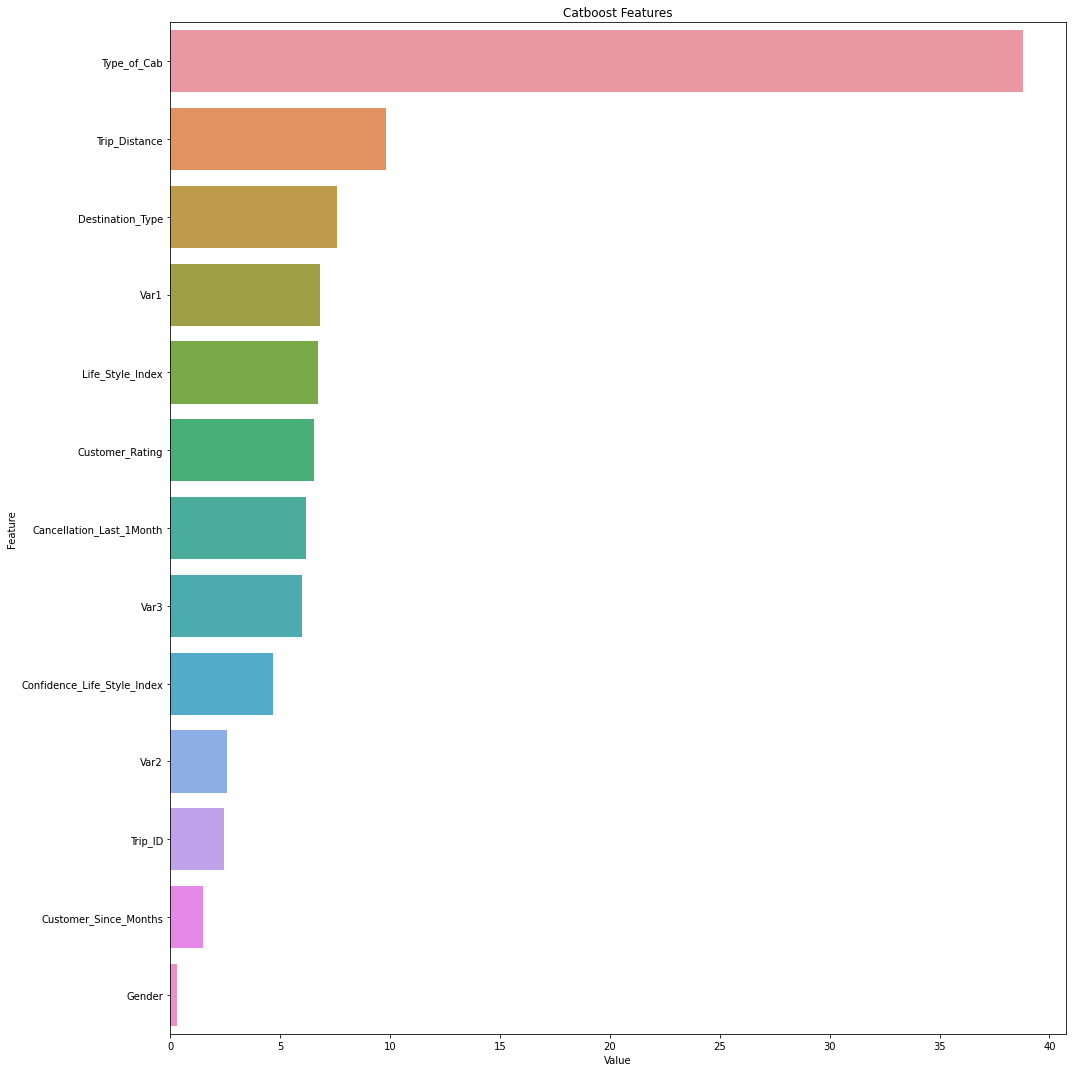

In [64]:

feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [0]:
Xtest = test

In [81]:

from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=4, shuffle=False, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=3,
                         random_seed=42, 
                         iterations=200, 
                         learning_rate=0.1,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200, cat_features=categorical_features_indices)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Accuracy:  0.6847126017742131
Accuracy:  0.6841657552558027
Accuracy:  0.6832751025368373
Accuracy:  0.6790521039039952


In [68]:
np.mean(errcat,0)

0.6820191147719039

In [69]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [70]:
y_pred_class = le.inverse_transform(cat_final)
df_sub = pd.DataFrame(data=y_pred_class, columns=['Surge_Pricing_Type'])
df_sub.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Surge_Pricing_Type
0,1
1,2
2,2
3,2
4,2


In [71]:

df_sub['Surge_Pricing_Type'].value_counts()

2    43960
3    29085
1    14350
Name: Surge_Pricing_Type, dtype: int64

In [0]:
df_sub.to_csv('cat.csv')

In [0]:
from google.colab import files
files.download('cat.csv')

# ensem

In [2]:
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-mobility-analytics/844_613210_us_cf934f22ddf9.csv #1
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-mobility-analytics/844_613210_us_0fe8f78e17ff_yBq2QrH.csv #2
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-mobility-analytics/844_613210_us_b66d9f1bda46.csv
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-mobility-analytics/844_613210_us_cat.csv #4
!wget https://datahack-prod.s3.amazonaws.com/submissions/janatahack-mobility-analytics/844_613210_us_AG_1.csv #5

--2020-05-17 17:58:52--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-mobility-analytics/844_613210_us_cf934f22ddf9.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.96
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1310953 (1.2M) [application/vnd.ms-excel]
Saving to: ‘844_613210_us_cf934f22ddf9.csv.1’

844_613210_us_cf934 100%[===================>]   1.25M  1.88MB/s    in 0.7s    

2020-05-17 17:58:53 (1.88 MB/s) - ‘844_613210_us_cf934f22ddf9.csv.1’ saved [1310953/1310953]

--2020-05-17 17:58:55--  https://datahack-prod.s3.amazonaws.com/submissions/janatahack-mobility-analytics/844_613210_us_0fe8f78e17ff_yBq2QrH.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.84
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.84|:443... connected.

In [0]:
df1=pd.read_csv('844_613210_us_cf934f22ddf9.csv')
df2=pd.read_csv('844_613210_us_0fe8f78e17ff_yBq2QrH.csv')
df3=pd.read_csv('844_613210_us_b66d9f1bda46.csv')
df4=pd.read_csv('844_613210_us_cat.csv')
df5=pd.read_csv('844_613210_us_AG_1.csv')

In [7]:

df1.head(2)

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2


In [0]:

y_pred1 = np.array(df1['Surge_Pricing_Type'])
y_pred2 = np.array(df2['Surge_Pricing_Type'])
y_pred3 = np.array(df3['Surge_Pricing_Type'])
y_pred4 = np.array(df4['Surge_Pricing_Type'])
y_pred5 = np.array(df5['Surge_Pricing_Type'])

In [0]:
y_pred = y_pred1*0.70 + y_pred2*0.15 + y_pred3*0.10 + y_pred4*0.03 + y_pred5*0.02


In [16]:
y_pred

array([1., 2., 2., ..., 1., 2., 2.])

In [17]:
sub = pd.DataFrame(data=y_pred, columns=['Surge_Pricing_Type'])
sub = sub.round().astype(int)
sub.head(5)

,Surge_Pricing_Type
0,1
1,2
2,2
3,3
4,2


In [12]:
sub['Surge_Pricing_Type'].value_counts()

2    44012
3    29877
1    13506
Name: Surge_Pricing_Type, dtype: int64

In [0]:
sub.to_csv('finalensem.csv', index=False)

In [0]:
from google.colab import files
files.download('finalensem.csv')